PERSIAPAN DATA

In [ ]:
import pandas as pd #dataframe
import numpy as np #komputasi numerik
#visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,PolynomialFeatures #preprocessing data
#membagi data
from sklearn.model_selection import train_test_split
#load model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
#metrics
from sklearn import metrics

In [186]:
#nama dataframe kita adalah df yang berisi data insurance.csv

df = pd.read_csv('insurance.csv')

In [187]:
#Melihat 5 baris teratas dari data kita

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [188]:
#Mengetahui jumlah kolom dan baris  dari data kita
#disini diketahui bahwa terdapat 7 kolom dan 1338 baris

df.shape

(1338, 7)

In [189]:
#Melihat informasi data kita mulai dari jumlah data, tipe data, memori yang digunakan dan lain lain.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [190]:
# Melihat statical deskripsi mulai dari banyaknya data, rata rata, standar deviasi, kuartil dan lain lain

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [191]:
# Mencari dan menangani data missing values
# Ternyata data kita tidak ada yang missing values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [192]:
# Seperti yang telah diketahui data dari fitur sex, smoker dan region berupa kategorikal,
# Maka perlu melakukan konversi data kategorikal ke data numerik agar dapat diolah

# kita ganti untuk kolom sex atau jenis kelamin terdiri dari female dan male. untuk female = 0 dan male =1
df.replace({'sex': {'female': 0, 'male': 1}}, inplace=True)
# kita ganti juga kolom smoker atau perokok terdiri dari no dan yes, untuk no=0 dan yes=1
df.replace({'smoker': {'no': 0, 'yes': 1}}, inplace=True)
# kita ganti lagi kolom region atau wilayah terdiri dari 4 wilayah ganti dengan northeast :0, southeast :1, southwest :2, northwest :3
df.replace({'region': {'northeast': 0, 'southeast': 1, 'southwest': 2, 'northwest':3}}, inplace=True)
df # kemudian kita tampilkan datanya

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,2,2007.94500


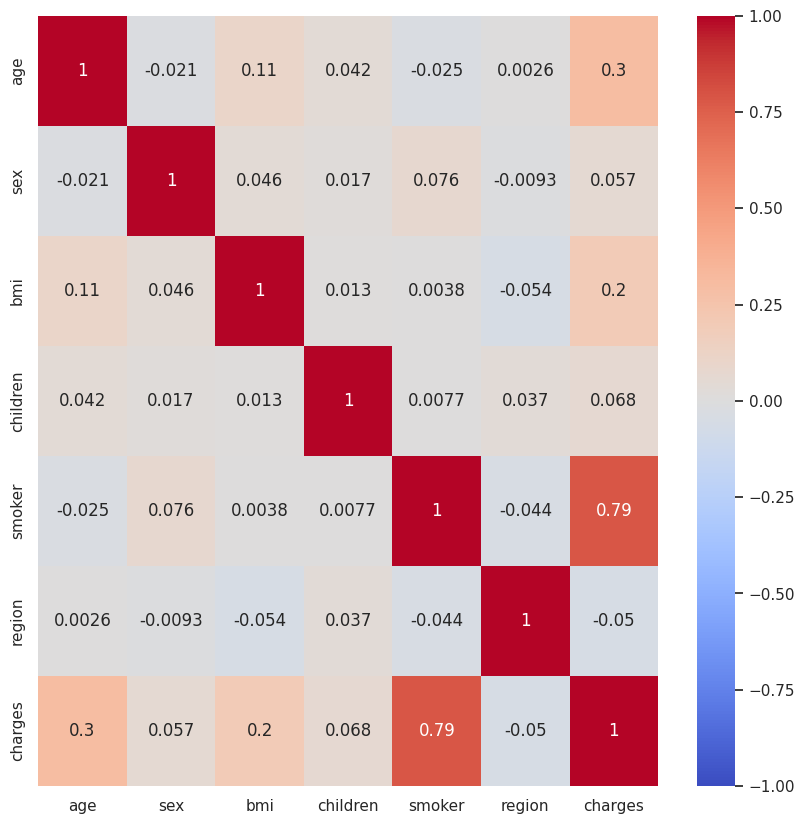

In [193]:
# Menggunakan fungsi yang telah disediakan oleh seaborn untuk melihat korelasi antar variabel atau fitur.
# Lebih tepatnya mengecek korelasi fitur terdahap label atau target.

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True)
plt.show()

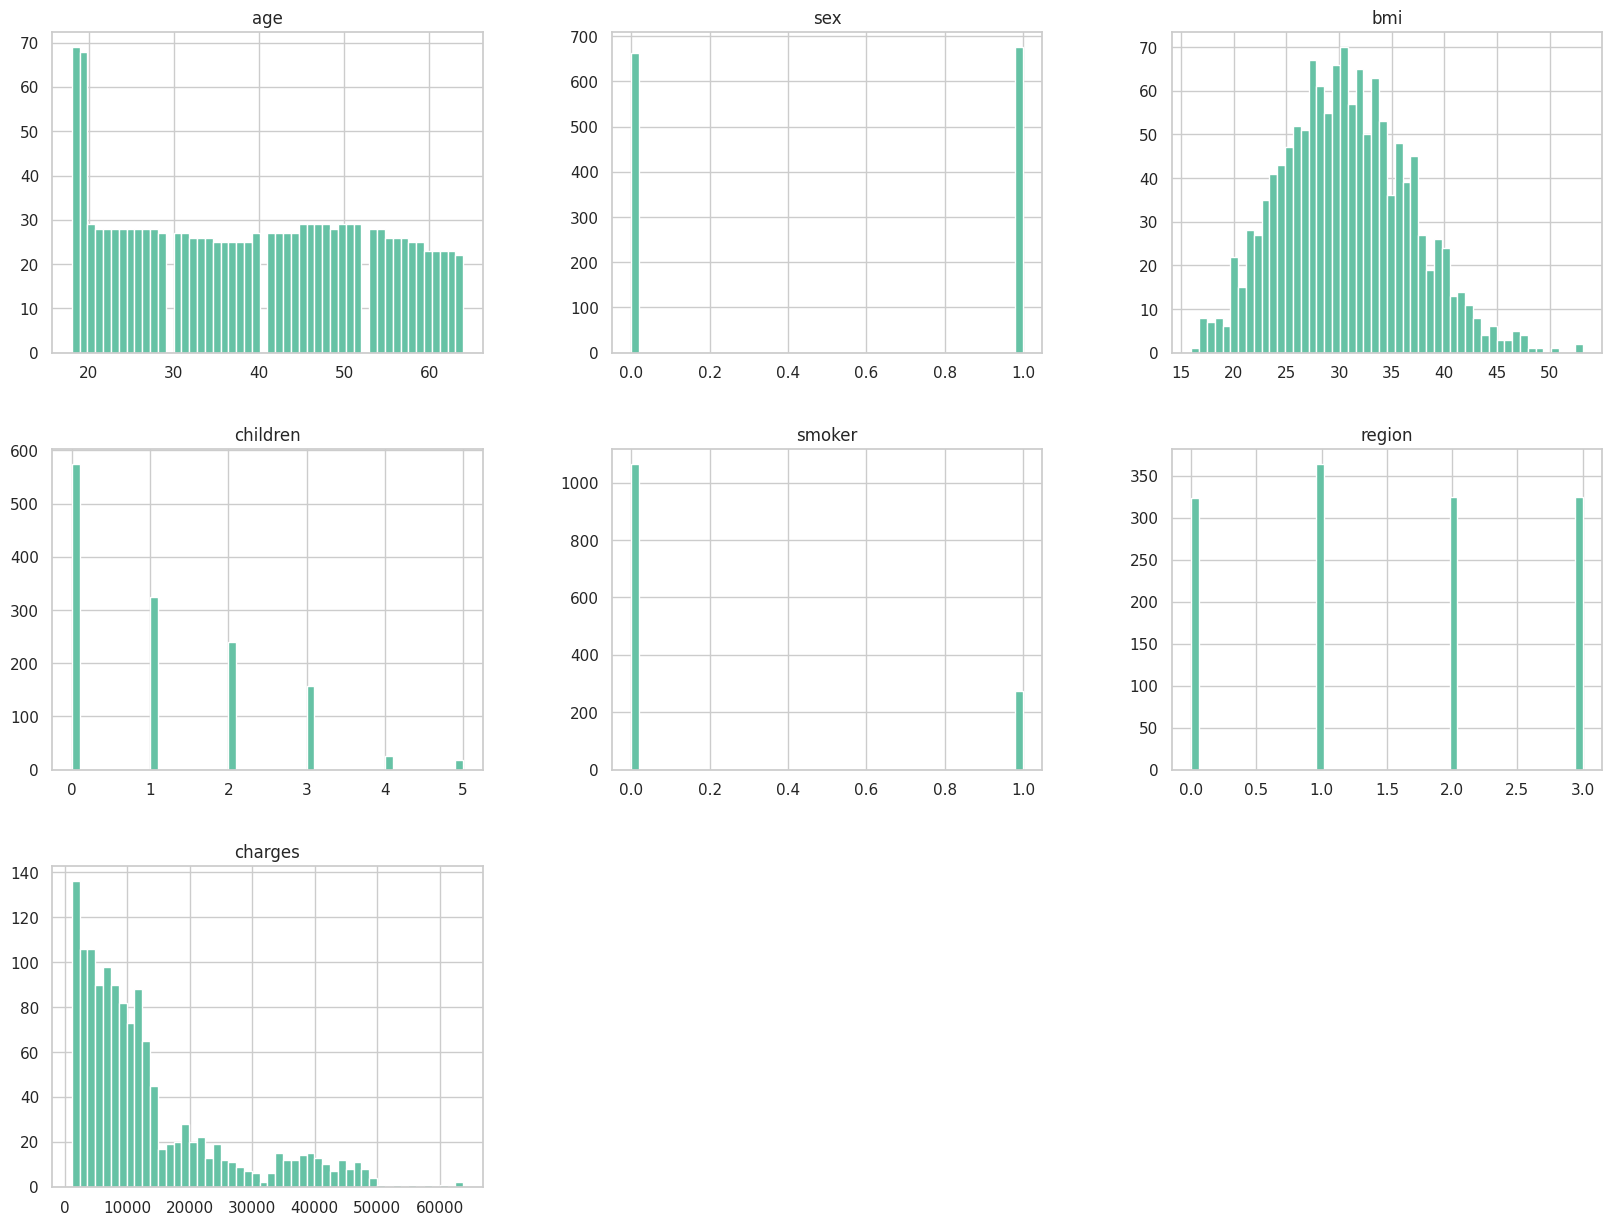

In [194]:
#visualisasi data histogram
#Histogram adalah jenis visualisasi data untuk merepresentasikan distribusi frekuensi dari dataset numerik
df.hist(bins=50, figsize=(20,15))
plt.show()

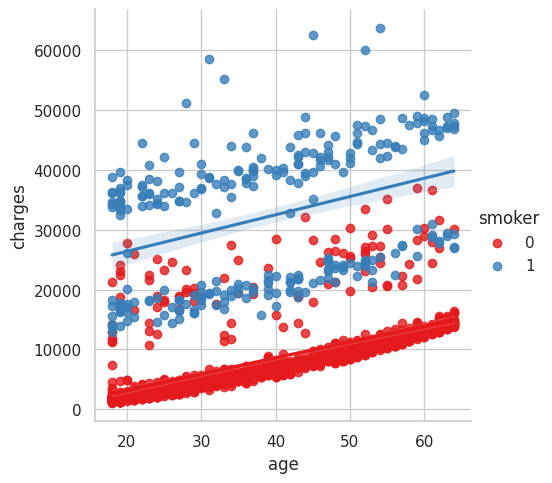

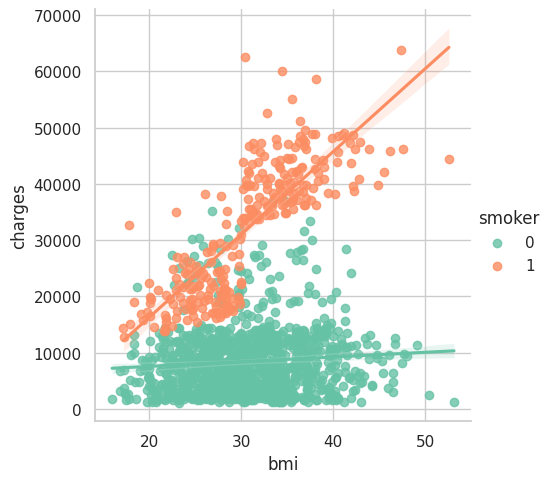

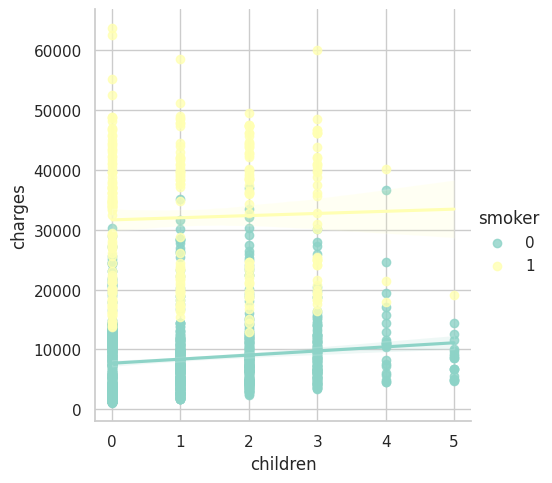

In [195]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

In [196]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


Train-Test-Split

In [197]:
X = df.drop(['charges'], axis=1)
y = df['charges']

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 6) (268, 6) (1070,) (268,)


In [199]:
# feature scaling
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

Modelling

In [200]:
def evaluate_model(model,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,print_metric=True):
  y_pred_train, y_pred_test = model.predict(X_train), model.predict(X_test)
  mse_train = mean_squared_error(y_train, y_pred_train)
  mse_test = mean_squared_error(y_test, y_pred_test)
  rmse_train, rmse_test = np.sqrt(mse_train), np.sqrt(mse_test)
  r2_train, r2_test = r2_score(y_train, y_pred_train), r2_score(y_test, y_pred_test)
  if print_metric:
        print(f'''On training set:\nMSE: {mse_train}    RMSE: {rmse_train}    r2: {r2_train}\n
=====================================\nOn test set:\nMSE: {mse_test}    RMSE: {rmse_test}    r2: {r2_test}''')
  return mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test

Linear Regression

In [201]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

_ ,_ ,_ ,mse, rmse, r2 = evaluate_model(lin_reg)

On training set:
MSE: 37824160.60871358    RMSE: 6150.135007356634    r2: 0.7361709127330633

On test set:
MSE: 32134400.3339633    RMSE: 5668.72122563487    r2: 0.7980619120055225


In [202]:
results_df = pd.DataFrame([['Linear Regression', mse,rmse,r2]], columns=['Model', 'MSE', 'RMSE', 'R^2'])
results_df

,Model,MSE,RMSE,R^2
0,Linear Regression,3.213440e+07,5668.721226,0.798062


Polynomial Regression

In [203]:
degree = [2,3,4,5]
results = []
for d in degree:
    poly_feat = PolynomialFeatures(degree=d)
    X_poly = poly_feat.fit_transform(X)
    Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)
    poly_reg = LinearRegression()
    poly_reg.fit(Xp_train, yp_train)

    mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test = evaluate_model(poly_reg, Xp_train, yp_train, Xp_test, yp_test,print_metric=False)

    results.append([d, mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test])
poly_results = pd.DataFrame(results, columns=['degree', 'mse_train', 'rmse_train', 'r2_train', 'mse_test', 'rmse_test', 'r2_test'])
poly_results

,degree,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test
0,2,2.497886e+07,4997.885480,0.825769,2.040771e+07,4517.489244,0.871754
1,3,3.425503e+07,5852.779556,0.761066,3.159976e+07,5621.366050,0.801422
2,4,2.130832e+07,4616.093726,0.851371,2.341692e+07,4839.103023,0.852844
3,5,1.959845e+07,4427.013640,0.863298,3.809044e+07,6171.744927,0.760633


In [204]:
#memilih degree 3
polynomial_model = PolynomialFeatures(degree=3)
polynomial_model = LinearRegression()
polynomial_model.fit(Xp_train, yp_train)
mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test = evaluate_model(polynomial_model, Xp_train, yp_train, Xp_test, yp_test,print_metric=True)

On training set:
MSE: 19598449.769845854    RMSE: 4427.013640124215    r2: 0.8632979283237769

On test set:
MSE: 38090435.44701686    RMSE: 6171.74492724844    r2: 0.7606331649227022


In [205]:
results_model = pd.DataFrame([['Polynomial Regression', *poly_results[poly_results['degree']==2].iloc[:,4:].values[0]]], columns=['Model', 'MSE', 'RMSE', 'R^2'])
results_df = results_df.append(results_model, ignore_index=True)
results_df

<ipython-input-205-dd00d8ac15d5>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_model, ignore_index=True)


,Model,MSE,RMSE,R^2
0,Linear Regression,3.213440e+07,5668.721226,0.798062
1,Polynomial Regression,2.040771e+07,4517.489244,0.871754


Random Forest

In [206]:
n_estimators = [10, 30, 100, 300, 1000, 3000]
max_leaf_nodes = [10, 30, 50, 75, 100]
results = []
for est in n_estimators:
    for n_nodes in max_leaf_nodes:
        for_reg = RandomForestRegressor(n_estimators=est, max_leaf_nodes=n_nodes, random_state=0)
        for_reg.fit(X_train, y_train)
        mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test = evaluate_model(for_reg,print_metric=False)
        results.append([est, n_nodes, mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test])
for_results_df = pd.DataFrame(results, columns=['n_estimators', 'n_nodes', 'mse_train', 'rmse_train', 'r2_train', 'mse_test', 'rmse_test', 'r2_test'])
for_results_df

,n_estimators,n_nodes,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test
0,10,10,2.015109e+07,4488.996587,0.859443,1.782335e+07,4221.771537,0.887995
1,10,30,1.533482e+07,3915.969639,0.893037,1.731482e+07,4161.108613,0.891191
2,10,50,1.186695e+07,3444.843311,0.917226,1.847911e+07,4298.733312,0.883874
3,10,75,9.010753e+06,3001.791556,0.937149,1.910143e+07,4370.518503,0.879963
4,10,100,6.912859e+06,2629.231605,0.951782,1.993908e+07,4465.319579,0.874699
5,30,10,2.028045e+07,4503.381934,0.858541,1.819100e+07,4265.091328,0.885685
6,30,30,1.511155e+07,3887.357991,0.894595,1.734394e+07,4164.605517,0.891008
7,30,50,1.152044e+07,3394.177061,0.919643,1.734737e+07,4165.017810,0.890986
8,30,75,8.353056e+06,2890.165317,0.941736,1.775021e+07,4213.100049,0.888455
9,30,100,6.214851e+06,2492.960360,0.956650,1.858722e+07,4311.289336,0.883195


In [207]:
max_r2 = max(for_results_df['r2_test'])
for_results_df[for_results_df['r2_test']==max_r2]

,n_estimators,n_nodes,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test
26,3000,30,1.464024e+07,3826.257038,0.897882,1.697374e+07,4119.919529,0.893334


In [208]:
min_rmse = min(for_results_df['rmse_test'])
for_results_df[for_results_df['rmse_test']==min_rmse]

,n_estimators,n_nodes,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test
26,3000,30,1.464024e+07,3826.257038,0.897882,1.697374e+07,4119.919529,0.893334


In [209]:
#memilih estimator 3000 and nodes 10
randomforest_model = RandomForestRegressor(n_estimators=3000, max_leaf_nodes=10, random_state=0)
randomforest_model.fit(X_train, y_train)
mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test = evaluate_model(randomforest_model,print_metric=True)

On training set:
MSE: 20029610.27527815    RMSE: 4475.445260002422    r2: 0.8602905203394858

On test set:
MSE: 17153139.773618463    RMSE: 4141.634915539812    r2: 0.8922067250987247


In [210]:
results_model_2 = pd.DataFrame([['Random Forest', *for_results_df[for_results_df['r2_test']==max_r2].iloc[:,5:].values[0]]], columns=['Model', 'MSE', 'RMSE', 'R^2'])
results_df = results_df.append(results_model_2, ignore_index=True)
results_df

<ipython-input-210-ccdb5530e73e>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_model_2, ignore_index=True)


,Model,MSE,RMSE,R^2
0,Linear Regression,3.213440e+07,5668.721226,0.798062
1,Polynomial Regression,2.040771e+07,4517.489244,0.871754
2,Random Forest,1.697374e+07,4119.919529,0.893334


EVALUASI

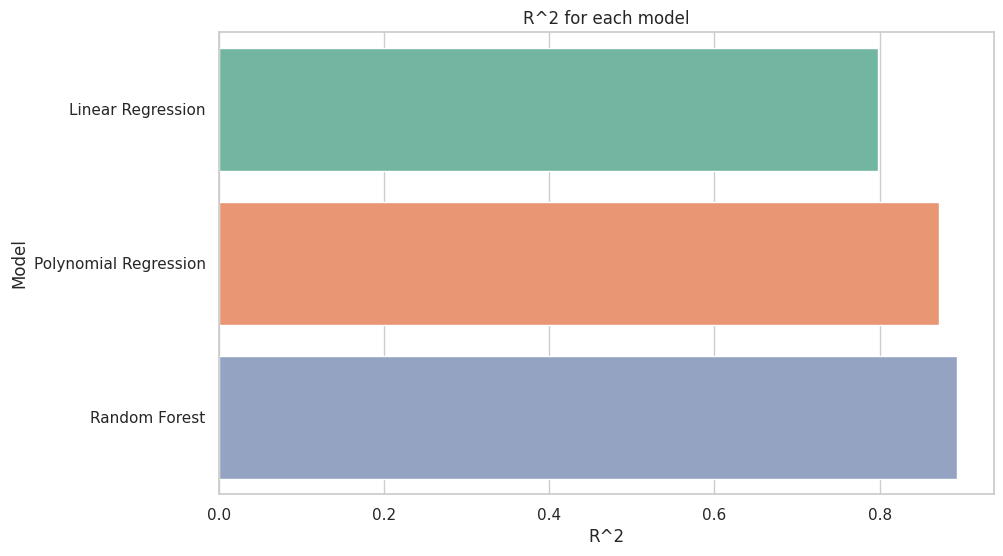

In [211]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.set_palette('Set2')
sns.set_style("whitegrid")
sns.barplot(x='R^2', y='Model', data=results_df)
plt.title('R^2 for each model')
plt.show()

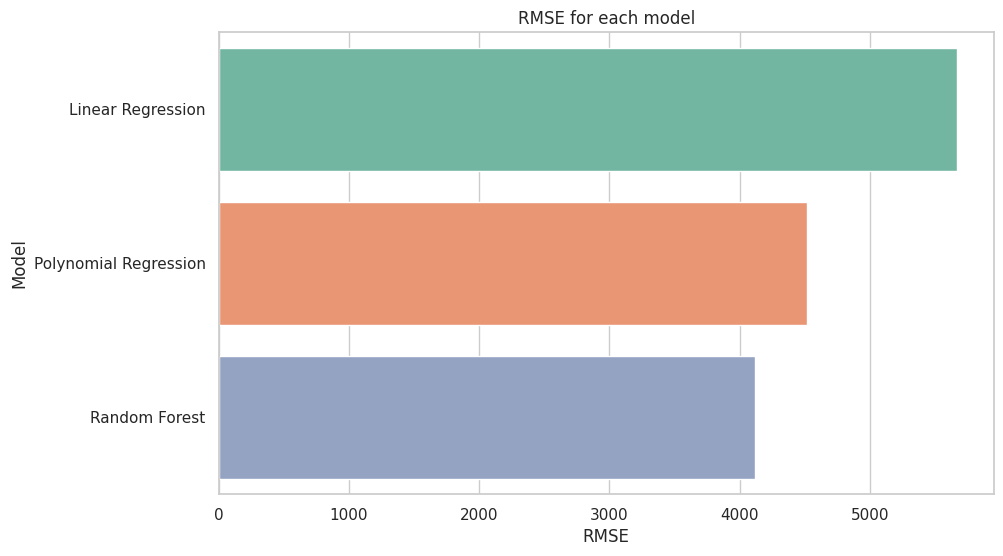

In [212]:
sns.barplot(x='RMSE', y='Model', data=results_df)
plt.title('RMSE for each model')
plt.show()

Prediksi

In [213]:
#Predicting the charges
y_test_pred_poly = polynomial_model.predict(Xp_test)
y_test_pred_for = randomforest_model.predict(X_test)
y_test_pred_lin = lin_reg.predict(X_test)
#Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted Polynomial': y_test_pred_poly,'Predicted Random Forest': y_test_pred_for,'Predicted Linear Regression': y_test_pred_lin})
df

,Actual,Predicted Polynomial,Predicted Random Forest,Predicted Linear Regression
578,9724.53000,11570.924127,12528.738465,11416.720670
610,8547.69130,10259.508217,10885.545387,9965.364570
569,45702.02235,49251.960707,44379.186057,37663.243511
1034,12950.07120,10428.972671,14264.495442,15832.019718
198,9644.25250,8698.407061,11314.358721,6806.897064
...,...,...,...,...
1084,15019.76005,18202.459285,15565.829933,14455.351323
726,6664.68595,7596.018080,6878.927172,7976.843853
1132,20709.02034,6352.847519,12483.212463,15607.617453
725,40932.42950,50529.303414,38812.211505,33174.487327
